## 0. data load / preprocessing

In [125]:
from datetime import datetime, timedelta
import time
str(datetime.today()- timedelta(1))[:10]

'2022-06-28'

In [22]:
# member_mate, member_basic, msg_log_back, pf_view_all_log 
# 2022-05-06 1일간 데이터셋으로 테스트 및 로직 구현

In [23]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pymysql
import pandas as pd
# cursor = conn.cursor(pymysql.cursors.DictCursor)
# sql = "show tables from m_yeoboya" 
# cursor.execute(sql)
# result = cursor.fetchall()
# cursor.close()
# tables = pd.DataFrame(result) # 데이터 프레임으로 변환환
# tables

In [25]:
# db 연동
# member_mate
conn = pymysql.connect(
    user='my_srv',              # 유저 이름
    passwd='wkrldi@duqhdi12',   # 패스워드
    host='125.141.223.156',     # 호스트
    db='m_yeoboya_ai_dv',             # 데이터베이스
    charset='utf8',             # 인코딩
    port=33141                  # 포트 번호(''없이 사용)
)


cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_mate" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
mate_df = pd.DataFrame(result) # 데이터 프레임으로 변환
mate_df.head(3)

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mate_slct_yn,mem_name_slct,...,family_conts_upd_cnt,secret_item_yn,secret_yn,respect_person_cont,my_point_cont,list_prt_yn,my_hd_item_yn,my_hd_yn,ins_date,upd_date
0,5,m,q,qnz,1977,1,9,w,y,y,...,13,y,y,,90,y,n,n,2015-07-22 16:31:35,2022-06-10 16:48:48
1,1793293,m,c,c11,1997,9,5,w,y,y,...,0,n,n,,70,y,n,n,2022-03-05 00:10:45,2022-06-26 14:58:29
2,1319014,m,i,i17,1959,3,3,w,y,y,...,4,n,n,,95,y,n,n,2020-09-26 10:47:22,2022-02-01 08:02:23


In [26]:
mate_df[mate_df['mem_no']==1697955]['mate_style']

78786    3
Name: mate_style, dtype: object

In [27]:
mate_df[mate_df['mem_no']==1697955]['mate_style']

78786    3
Name: mate_style, dtype: object

In [28]:
# member_basic
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_basic" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
basic_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
basic_df.head(3)

,mem_no,mem_id,mem_passwd,mem_passwd_v1,mem_passwd_v2,passwd_tmp_yn,mem_nick,mem_nick_yn,mem_sex,mem_birth_year,...,mate_reg_yn,mem_slct,matchmk_mem_no,matchmk_conts,smtp_slct,smtp_id,app_ver,phone_ver,mem_chnl,upd_date
0,2,ag315@gmail.com,*EE8B70CCF4C155606422917955B852444BB120A9,d8f93948f3d3c283102c19e6db44356451b9985540178e...,,n,디노킹,y,m,1971,...,y,b,0,,b,BD31B3FA-7EE3-4739-A2BB-23B3D1A8BDC3,6.6.103,15.4.1,501,2015-07-22 16:21:21
1,5,dntn20@naver.com,*9CC98632AA58449C1C67E7A30BDC3647BFAA6293,f8dc94048d37ead74a70a0a94bdbc9e3fcdec63258c5c9...,,n,바쉐린,n,m,1977,...,y,b,0,,a,c16a8b0029801ff1,1.5.321,10,501,2015-07-22 16:25:49
2,57,baroom@naver.com,*BE52216085D67EE7619B0D23D61C04D14FBA8922,7c07727cb559b31f69ee693a92e4eeada400f13bc370cd...,,n,허니버터,y,m,1977,...,y,b,0,,a,b59e1c528cfb2268,1.5.311,12,501,2015-07-27 09:03:18


In [29]:
# member_pf_view_all_log
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_pf_view_all_log where ins_date between '2022-05-26' and '2022-05-27'" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
view_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
view_df.head(3)

,auto_no,mem_no,mem_sex,ptr_mem_no,ptr_mem_sex,ptr_rprsn_photo_yn,open_slct,open_date,open_type,item_cnt,ins_date
0,330675437,1007047,m,1593834,f,n,v,2022-05-26 00:00:01,0,0,2022-05-26 00:00:01
1,330675438,1243783,m,951163,f,n,v,2022-05-26 00:00:04,0,0,2022-05-26 00:00:04
2,330675439,1825991,m,1855230,f,n,v,2022-05-26 00:00:04,0,0,2022-05-26 00:00:04


In [30]:
# 1개만 카운트하기 위해 중복 회원 쌍 제거, member_mate에 있는 회원만 사용
view_df.drop_duplicates(inplace=True, subset=['mem_no','ptr_mem_no'])
view_df.reset_index(drop=True,inplace=True)
view_df = view_df[view_df['mem_no'].isin(mate_df['mem_no'].values)]
view_df = view_df[view_df['ptr_mem_no'].isin(mate_df['mem_no'].values)]
print(len(view_df))

126360


In [31]:
# member_msg_log_back
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_msg_log_back where ins_date between '2022-05-26' and '2022-05-27'" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
msg_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
msg_df.head(3)

,auto_no,mem_no,mem_sex,mem_birth_year,mate_slct,login_media,mem_slct,ptr_mem_no,ptr_mem_sex,ptr_mem_birth_year,ptr_mate_slct,ptr_login_media,read_yn,msg_type,msg_slct,msg_cont,msg_etc,file_name,file_size,ins_date
0,203405484,1791172,f,1985,r,s,o,1851320,m,1985,w,s,n,1,0,여자한테 어떤 스탈이야?,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-26 00:00:00
1,203405486,1854226,m,1987,w,s,g,1855244,f,1995,r,s,n,1,0,안녕하세요 ^^,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-26 00:00:01
2,203405488,1662551,f,1964,r,s,n,1849083,m,1962,r,,n,1,0,안녕하세요?\n서로 솔직하게 대화 나누어보고 싶습니다.,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-26 00:00:03


In [32]:
# 1개만 카운트하기 위해 중복 회원 쌍 제거, member_mate에 있는 회원만 사용
msg_df.drop_duplicates(inplace=True, subset=['mem_no','ptr_mem_no'])
msg_df = msg_df[msg_df['mem_no'].isin(mate_df['mem_no'].values)]
msg_df = msg_df[msg_df['ptr_mem_no'].isin(mate_df['mem_no'].values)]
msg_df.reset_index(drop=True,inplace=True)
len(msg_df)

19888

In [33]:
from datetime import datetime

In [34]:
# age 연산
mate_df['age'] = int(str(datetime.today())[:4]) - mate_df['mem_birth_year']
df = mate_df[['mem_no','mem_sex','age']]
# df.head()

In [35]:
# x가 열람한 회원 리스트
df['view_list'] = None
for i in range(len(df)) :
    view_list = view_df[view_df['mem_no']==df.loc[i, 'mem_no']]['ptr_mem_no'].values.tolist()
    df.loc[i, 'view_list'] = [[view_list]]
# df.head(3)

In [36]:
df['view_list'] = df['view_list'].apply(lambda x : x[0])
df['view_count'] = df['view_list'].apply(lambda x : len(x)) # 총 열람 횟수

In [37]:
# x를 열람한 회원 리스트
df['viewed_list'] = None
for i in tqdm(range(len(df))) :
    viewed_list = view_df[view_df['ptr_mem_no']==df.loc[i, 'mem_no']]['mem_no'].values.tolist()
    df.loc[i, 'viewed_list'] = [[viewed_list]]
# df.head()

100%|█████████████████████████████████████████████████████████████████████████| 124641/124641 [07:32<00:00, 275.25it/s]


In [38]:
df['viewed_list'] = df['viewed_list'].apply(lambda x : x[0])
df['viewed_count'] = df['viewed_list'].apply(lambda x : len(x)) # 총 열람된 횟수

In [39]:
# view count / viewed count 1 이상만 남김
df = df[(df['view_count']>0) & (df['viewed_count']>0)]
df.reset_index(drop=True, inplace=True)
df.head(3)

,mem_no,mem_sex,age,view_list,view_count,viewed_list,viewed_count
0,1350974,m,45,"[1844673, 1854956, 1615672, 1765501, 1624688, ...",35,"[1836218, 1820276]",2
1,1049851,m,45,"[1855569, 1855871]",2,[1755452],1
2,1851234,m,51,"[1761351, 1644531, 1581464, 1778318, 737694, 1...",8,[1644531],1


In [40]:
# 메시지 발신 회원 리스트
df['send_list'] = None
for i in tqdm(range(len(df))) :
    send_list = msg_df[msg_df['mem_no']==df.loc[i, 'mem_no']]['ptr_mem_no'].values.tolist()
    df.loc[i, 'send_list'] = [[send_list]]
# df.head()

100%|████████████████████████████████████████████████████████████████████████████| 8646/8646 [00:07<00:00, 1108.96it/s]


In [41]:
# 메시지 수신 회원 리스트
df['sent_list'] = None
for i in tqdm(range(len(df))) :
    sent_list = msg_df[msg_df['ptr_mem_no']==df.loc[i, 'mem_no']]['mem_no'].values.tolist()
    df.loc[i, 'sent_list'] = [[sent_list]]
# df.head()

100%|████████████████████████████████████████████████████████████████████████████| 8646/8646 [00:07<00:00, 1111.47it/s]


In [42]:
df['send_list'] = df['send_list'].apply(lambda x : x[0])
df['sent_list'] = df['sent_list'].apply(lambda x : x[0])

In [43]:
df['send_count'] = df['send_list'].apply(lambda x : len(x)) # 총 발신 수 
df['sent_count'] = df['sent_list'].apply(lambda x : len(x)) # 총 수신 수
df.head(3)

,mem_no,mem_sex,age,view_list,view_count,viewed_list,viewed_count,send_list,sent_list,send_count,sent_count
0,1350974,m,45,"[1844673, 1854956, 1615672, 1765501, 1624688, ...",35,"[1836218, 1820276]",2,[],[],0,0
1,1049851,m,45,"[1855569, 1855871]",2,[1755452],1,[],[],0,0
2,1851234,m,51,"[1761351, 1644531, 1581464, 1778318, 737694, 1...",8,[1644531],1,[],[],0,0


In [44]:
# send count / sent count 1 이상만 남김
df = df[(df['send_count']>0) & (df['sent_count']>0)]
df.reset_index(drop=True, inplace=True)
# df.head()

In [45]:
len(df)

2298

## 1. CF score 구현

In [46]:
# 여자 1855569 남자 1737706	,1850022,  1588080, 1835811, 1070074, 1777327, 1823200, 1616174, 1802714
#1855569 - 1635619
x, y = 1855569, 1737706
sent_to_y = df[df['mem_no']==y]['sent_list'].values[0]
score_x_y = 0
for u in sent_to_y :
    try :
        u_refrom = df[df['mem_no']==u]['send_list'].values[0]
        x_refrom = df[df['mem_no']==x]['send_list'].values[0]
        intersection = list(set(u_refrom) & set(x_refrom))
#         print(intersection)
        union = list(set(u_refrom) | set(x_refrom))
#         print(union)
        if len(intersection) == 0 :
            continue
        score_x_y += len(intersection) / len(union)
    except :
        print('error :', u)
        pass
    
print(score_x_y)

0.05263157894736842


In [47]:
sent_to_x = df[df['mem_no']==x]['sent_list'].values[0]
score_y_x = 0
for v in sent_to_x :
    try:
        v_refrom = df[df['mem_no']==v]['send_list'].values[0]
        y_refrom = df[df['mem_no']==y]['send_list'].values[0]
        intersection = list(set(v_refrom) & set(y_refrom))
        union = list(set(v_refrom) | set(y_refrom))
        if len(intersection) == 0 :
            continue
        score_y_x += len(intersection) / len(union)
    except :
        pass

print(score_y_x)

0.7842891322449945


In [48]:
# harmonic mean
(2 * score_x_y * score_y_x) / (score_x_y + score_y_x)

0.09864345529818733

In [49]:
def get_cf_score(x, y) :
    sent_to_x = df[df['mem_no']==x].sent_list.values[0]    
    sent_to_y = df[df['mem_no']==y].sent_list.values[0]
    score_x_y, score_y_x = 0, 0
    for u in sent_to_y :
        try :
            u_refrom = df[df['mem_no']==u].send_list.values[0]
            x_refrom = df[df['mem_no']==x].send_list.values[0]
            intersection = list(set(u_refrom) & set(x_refrom))
            union = list(set(u_refrom) | set(x_refrom))
            if len(intersection) == 0 :
                continue
            score_x_y += len(intersection) / len(union)
        except :
            pass
        
    for v in sent_to_x :
        try :
            v_refrom = df[df['mem_no']==v].send_list.values[0]
            y_refrom = df[df['mem_no']==y].send_list.values[0]
            intersection = list(set(v_refrom) & set(y_refrom))
            union = list(set(v_refrom) | set(y_refrom))
            if len(intersection) == 0 :
                continue
            score_y_x += len(intersection) / len(union)
        except Exception as e :
            pass
#     print(score_x_y, score_y_x)
    
    if score_x_y > 0 and score_y_x > 0 :    
        harmonic_mean_score = (2 * score_x_y * score_y_x) / (score_x_y + score_y_x)
    else :
        harmonic_mean_score = 0
        
    return harmonic_mean_score
    

---

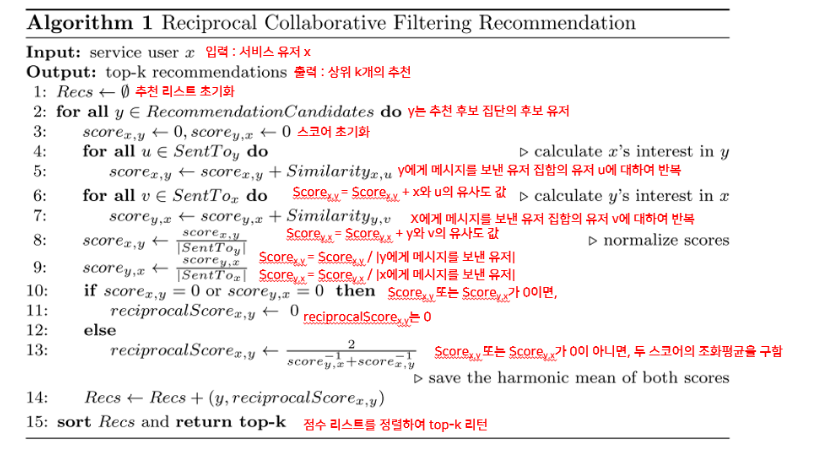

In [50]:
# get reciprocal_CF_Score
def get_top_k(x, top_k=1) :
    
    # 나이 제한 +- 5 이내에서만 검색
    x_age = df[df['mem_no']==x].age.values[0]
    x_gender = df[df['mem_no']==x].mem_sex.values[0]
    # recommendation candidate y range(age +- 5)
    y_range = df[(abs(x_age - df['age']) <= 5) & (df['mem_sex']!=x_gender)].mem_no.values
    
    # x에게 메시지 보낸 회원 SentTo_x
    sent_to_x = df[df['mem_no']==x].sent_list.values[0]
    # 추천 리스트[(회원번호, 점수)] 초기화
    score_list = list()
    
    print(f'my_candidate_num : {len(y_range)}') # 총 후보 수(연산 대상)
    
    for y in y_range : # 추천 후보 집단(RecommendationCandidates)의 모든 y에 대하여 반복 수행
        sent_to_y = df[df['mem_no']==y].sent_list.values[0] 
        # calculate score x_y
        score_x_y = 0 # score_x_y 초기화
        for u in sent_to_y : # y에게 메시지를 보낸 유저 집단 u에 대하여 반복 수행
            try :
                u_refrom = df[df['mem_no']==u].send_list.values[0] # u가 메시지를 보낸 유저 집합 
                x_refrom = df[df['mem_no']==x].send_list.values[0] # x가 메시지를 보낸 유저 집단
                intersection = list(set(u_refrom) & set(x_refrom)) # ReFrom_u ∩ ReFrom_x
                union = list(set(u_refrom) | set(x_refrom)) # ReFrom_u ∪ ReFrom_x
                
                if len(intersection) == 0 : # avoid zero division
                    continue
                score_x_y += len(intersection) / len(union)    # score_x_y <--- score_x_y + similarity_x_u
            except :
                pass
        score_y_x = 0 # score_y_x 초기화
        for v in sent_to_x : # x에게 메시지를 보낸 유저 집단 v에 대하여 반복 수행
            try :
                v_refrom = df[df['mem_no']==v].send_list.values[0] # v가 메시지를 보낸 유저 집합 
                y_refrom = df[df['mem_no']==y].send_list.values[0] # y가 메시지를 보낸 유저 집단
                intersection = list(set(v_refrom) & set(y_refrom)) # ReFrom_v ∩ ReFrom_y
                union = list(set(v_refrom) | set(y_refrom)) # ReFrom_v ∪ ReFrom_y
                
                if len(intersection) == 0 : # avoid zero division
                    continue
                score_y_x += len(intersection) / len(union) # score_y_x <--- score_y_x + similarity_y_v
            except :
                pass
            
        # calculate harmonic mean
        if score_x_y != 0 and score_y_x != 0 :    
            harmonic_mean_score = (2 * score_x_y * score_y_x) / (score_x_y + score_y_x)
        else :
            harmonic_mean_score = 0
        score_list.append((y, harmonic_mean_score)) # Recs <--- (y, reciprocalScore_x,y)
    
    top_k = sorted(score_list, key=lambda x : -x[1])[:top_k]
    
    return top_k # sort score and return top-k

In [51]:
get_top_k(1855569)

my_candidate_num : 303


[(1810608, 1.9977198054935195)]

In [52]:
get_top_k(1609721)

my_candidate_num : 153


[(1492781, 1.4662223399656995)]

---

## 2. PR score 구현 

In [53]:
# 긍정 응답 메시지 찾기
bi_temp = pd.DataFrame()
cnt = 0
temp = msg_df.copy()[['mem_no', 'ptr_mem_no']]
temp2 = temp.rename(columns={'mem_no' : 'ptr_mem_no', 'ptr_mem_no' : 'mem_no'})
for i in tqdm(range(len(temp))) :
    t = temp[(temp['mem_no']==temp2.loc[i, 'mem_no']) & (temp['ptr_mem_no']==temp2.loc[i, 'ptr_mem_no'])]
    if len(t) >= 1 :
        cnt += 1
        bi_temp = pd.concat([bi_temp, t])
        
print(cnt)
    
bi_temp.head()

100%|██████████████████████████████████████████████████████████████████████████| 19888/19888 [00:16<00:00, 1227.82it/s]

4916


,mem_no,ptr_mem_no
28,1287538,1309600
4640,1804321,1763160
17,1768665,1851868
109,157399,1841708
19,1841708,1501258


In [54]:
bi_temp['response_positive'] = 1

In [55]:
temp = temp.drop(bi_temp.index)
temp['response_positive'] = 0

In [56]:
pr = pd.concat([bi_temp, temp])
pr['response_positive'].value_counts()

0    14972
1     4916
Name: response_positive, dtype: int64

---

### Feature 생성

In [57]:
temp = pd.merge(df[['mem_no','mem_sex','age','view_count','viewed_count','send_count','sent_count']], basic_df[['mem_no','login_cnt', 'tot_stay_time']])
info = pd.merge(temp, mate_df[['mem_no','photo_cnt', 'upd_cnt']])
info.head()

,mem_no,mem_sex,age,view_count,viewed_count,send_count,sent_count,login_cnt,tot_stay_time,photo_cnt,upd_cnt
0,1777451,m,54,11,1,2,1,195,14875,0,3
1,1609721,m,65,61,40,54,5,881,337806,4,86
2,724703,m,44,1,1,1,1,11430,1356499,2,15
3,1657316,f,43,1,2,1,2,233,2821,1,1
4,1688575,m,58,44,7,25,4,4711,871067,2,11


In [58]:
ptr_info = info.copy()
ptr_info.columns = ['ptr_' + i for i in ptr_info.columns]
ptr_info.head()

,ptr_mem_no,ptr_mem_sex,ptr_age,ptr_view_count,ptr_viewed_count,ptr_send_count,ptr_sent_count,ptr_login_cnt,ptr_tot_stay_time,ptr_photo_cnt,ptr_upd_cnt
0,1777451,m,54,11,1,2,1,195,14875,0,3
1,1609721,m,65,61,40,54,5,881,337806,4,86
2,724703,m,44,1,1,1,1,11430,1356499,2,15
3,1657316,f,43,1,2,1,2,233,2821,1,1
4,1688575,m,58,44,7,25,4,4711,871067,2,11


In [59]:
temp = pd.merge(pr, info)
pr_df = pd.merge(temp, ptr_info)
pr_df.head()

,mem_no,ptr_mem_no,response_positive,mem_sex,age,view_count,viewed_count,send_count,sent_count,login_cnt,...,ptr_mem_sex,ptr_age,ptr_view_count,ptr_viewed_count,ptr_send_count,ptr_sent_count,ptr_login_cnt,ptr_tot_stay_time,ptr_photo_cnt,ptr_upd_cnt
0,1804321,1763160,1,m,64,25,2,9,2,90,...,f,58,3,9,1,2,1245,350721,1,29
1,1804321,1738022,1,m,64,25,2,9,2,90,...,f,59,2,4,1,1,781,125005,4,3
2,1804321,1855620,0,m,64,25,2,9,2,90,...,f,61,23,715,7,46,291,10693,2,1
3,1681838,1855620,1,m,59,6,4,3,3,1156,...,f,61,23,715,7,46,291,10693,2,1
4,1699218,1855620,1,m,61,17,3,5,2,2966,...,f,61,23,715,7,46,291,10693,2,1


In [60]:
pr_df_female = pr_df[pr_df['mem_sex']=='f']
pr_df_male = pr_df[pr_df['mem_sex']=='m']
# pr_df_female.head(1)

In [61]:
pr_df_female.columns = [i.replace('ptr_','') if 'ptr_' in i or i == 'response_positive' else 'ptr_' + i for i in pr_df_female.columns]
# pr_df_female.head(1)

In [62]:
pr_df = pd.concat([pr_df_male, pr_df_female])
# pr_df['mem_sex'].value_counts()

In [63]:
pr_df = pr_df.drop(['mem_no','ptr_mem_no','mem_sex','ptr_mem_sex'], axis =1)
pr_df['age_gap'] = (pr_df['age'] - pr_df['ptr_age'])

### Train Model

In [64]:
X = pr_df.drop('response_positive', axis=1)
y = pr_df['response_positive']

In [65]:
y.value_counts()

1    4130
0    3788
Name: response_positive, dtype: int64

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777, test_size=0.3)

In [67]:
model = AdaBoostClassifier(n_estimators=100,learning_rate=0.5, 
                           random_state=77)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

In [68]:
model = CatBoostClassifier(random_state=77, silent=True )
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

In [69]:
from sklearn.metrics import auc, f1_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
print(f'AUC Score : {auc(fpr,tpr):.3f}')

AUC Score : 0.893


In [70]:
f1_score(y_test, pred)
print(f'f1 score : {f1_score(y_test, pred):.3f}')

f1 score : 0.837


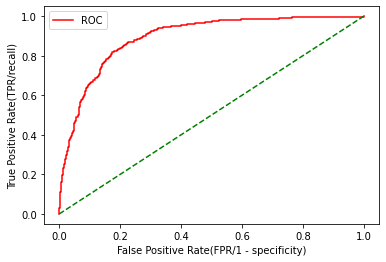

In [71]:
import matplotlib.pyplot as plt


def draw_roc_curve(fper, tper) :
    plt.plot(fper, tper, color='red', label='ROC', )
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate(FPR/1 - specificity)')
    plt.ylabel('True Positive Rate(TPR/recall)')
    plt.legend()
    plt.show()
    
draw_roc_curve(fpr, tpr)

In [72]:
for i,j,p in zip(y_test, pred, pred_proba) :
    print(f'pred : {i}, true : {j} -----------------> proba : {p} ' )

pred : 0, true : 0 -----------------> proba : [0.99162126 0.00837874] 
pred : 0, true : 0 -----------------> proba : [0.96976082 0.03023918] 
pred : 0, true : 0 -----------------> proba : [0.58090304 0.41909696] 
pred : 1, true : 1 -----------------> proba : [0.10758472 0.89241528] 
pred : 1, true : 1 -----------------> proba : [0.17085255 0.82914745] 
pred : 0, true : 0 -----------------> proba : [0.92573771 0.07426229] 
pred : 1, true : 0 -----------------> proba : [0.72848609 0.27151391] 
pred : 0, true : 0 -----------------> proba : [0.95125408 0.04874592] 
pred : 1, true : 1 -----------------> proba : [0.04342478 0.95657522] 
pred : 1, true : 0 -----------------> proba : [0.93409378 0.06590622] 
pred : 1, true : 1 -----------------> proba : [0.08370802 0.91629198] 
pred : 1, true : 1 -----------------> proba : [0.03684977 0.96315023] 
pred : 0, true : 0 -----------------> proba : [0.85848947 0.14151053] 
pred : 0, true : 1 -----------------> proba : [0.11642627 0.88357373] 
pred :

pred : 0, true : 0 -----------------> proba : [0.55292172 0.44707828] 
pred : 0, true : 0 -----------------> proba : [0.73686176 0.26313824] 
pred : 0, true : 1 -----------------> proba : [0.19835829 0.80164171] 
pred : 1, true : 1 -----------------> proba : [0.33866391 0.66133609] 
pred : 0, true : 0 -----------------> proba : [0.87831529 0.12168471] 
pred : 0, true : 0 -----------------> proba : [0.98685955 0.01314045] 
pred : 0, true : 0 -----------------> proba : [0.94763242 0.05236758] 
pred : 1, true : 1 -----------------> proba : [0.23926275 0.76073725] 
pred : 1, true : 1 -----------------> proba : [0.14449554 0.85550446] 
pred : 1, true : 1 -----------------> proba : [0.12384935 0.87615065] 
pred : 1, true : 1 -----------------> proba : [0.30296057 0.69703943] 
pred : 0, true : 0 -----------------> proba : [0.87746136 0.12253864] 
pred : 1, true : 1 -----------------> proba : [0.20992768 0.79007232] 
pred : 0, true : 0 -----------------> proba : [0.77362492 0.22637508] 
pred :

In [73]:
import joblib
joblib.dump(model, './predpr.pkl')
model = joblib.load('./predpr.pkl')

---

In [74]:
# get PR_Score
import numpy as np
def pred_positive_reply(x, y) :
    x_info = info[info['mem_no']==x]
    y_info = info[info['mem_no']==y]
    if info[info['mem_no']==x].mem_sex.values[0] == 'f' :
        x_info.columns = ['ptr_' + c for c in x_info.columns]
    else :
        y_info.columns = ['ptr_' + c for c in y_info.columns]
    x_y_info = pd.concat([y_info.reset_index(drop=True), x_info.reset_index(drop=True)],axis=1)
    x_y_info.drop(['mem_no','ptr_mem_no','mem_sex','ptr_mem_sex'], axis=1, inplace=True)
    x_y_info['age_gap'] = x_y_info['age'] - x_y_info['ptr_age']
    pred = model.predict_proba(x_y_info)[0]
    idx = np.argmax(pred)
    return idx, pred[idx]

In [75]:
x, y = 1855569, 1737706

pred_positive_reply(x,y)

(1, 0.717993110682371)

---

---

## 3. Correlation-based Explanation Method

In [76]:
# 테스트 용으로 특성 일부만 적용해서 로직 구현
# 지역, 학력, 연봉, 흡연, 건강, 키

In [77]:
property_df = mate_df[['mem_no', 'mem_sex', 'mem_loc', 'mate_religion', 'mate_car', 'mate_job', 'mate_ann_salary',
       'mate_career', 'mate_style', 'mate_charc', 'mate_hobby', 'favor_food', 'possess_property',
        'smoke_slct', 'drink_slct','health_slct', 'mate_height', 'mate_slct']]
property_df.head()

,mem_no,mem_sex,mem_loc,mate_religion,mate_car,mate_job,mate_ann_salary,mate_career,mate_style,mate_charc,mate_hobby,favor_food,possess_property,smoke_slct,drink_slct,health_slct,mate_height,mate_slct
0,5,m,q,5,5,24,8,4,6,"3,4,6","6,16,28","28,29,50,64,",f,a|,a|,b|b,186,w
1,1793293,m,c,0,2,32,4,8,2,"3,4,19,","4,21,24,32,","13,18,19,20,25,26,28,",d,c|c02,b|c,b|c,175,w
2,1319014,m,i,5,4,51,4,3,16,"4,5,6,","12,16,19,40,43,","4,55,58,63,64,",g,a|,b|b,d|c,175,w
3,2,m,e,5,3,16,6,3,9,"3,4,7","4,12,16","6,7,30,",c,b|b05,b|c,c|b,178,r
4,1688231,m,b,0,9,8,3,3,2,"4,7,9,","2,4,17,25,27,","29,30,34,56,67,68,96,",b,a|,c|c,a|,166,w


### 컬럼 전처리

In [78]:
bins = [0, 150, 160, 170, 180, 200]
property_df['mate_height'] = pd.cut(property_df['mate_height'], bins=bins, labels=['under_150', '150', '160', '170', 'over_180'])

In [79]:
favor_food_type = {'type_1': [5, 12, 13, 15, 92, 93, 96, 97, 98],
                   'type_2': [72, 73, 74, 75, 76, 77, 82, 83],
                   'type_3': [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
                   'type_4': [47, 49, 50, 52, 54, 48, 57, 63, 64, 70, 71, 94, 95, 99],
                   'type_5': [6, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
                   'type_6': [8, 9, 10, 14, 17],
                   'type_7': [51, 53, 55, 56, 59, 60, 61, 62, 65],
                   'type_8': [1, 2, 3, 4, 7, 18, 80, 100],
                   'type_9': [11, 31, 58, 66, 67, 68, 69, 79, 81, 84, 85, 86, 87, 88]}

hobby_type = {'type_1': [11, 12, 18, 40, 41, 42, 43, 44],
              'type_2': [8, 15, 16, 19],
              'type_3': [1, 3, 4, 6, 13, 14, 21, 24, 25, 26, 27, 30, 32, 33, 34, 35, 39],
              'type_4': [5, 7, 17, 28, 29]}

male_char_type = {'type_1': [3, 5, 9, 13],
                  'type_2': [1, 10, 11, 17, 19],
                  'type_3': [4, 6, 8],
                  'type_4': [2, 12, 14, 15, 16, 18]}

female_char_type = {'type_1': [1, 10, 11, 17, 19],
                    'type_2': [1, 2, 11, 12, 20, 22],
                    'type_3': [4, 5, 7, 14, 9],
                    'type_4': [16, 17, 18, 19, 21, 13]}

drink_key = {'a' : 0 ,'b' : 1, 'c' : 2, 'd' : 3}
health_key = {'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3}
career_key = {0 : 1, 1: 1, 2: 1, 3 : 3, 4: 4, 5: 4, 6 : 2,7 : 2, 8 : 2, 9 : 4, 10 : 4, 11 : 4, 12 : 2}
salary_key = {1 : 1,2 : 1,3: 1,4 : 2,5: 2,6 : 3,7 : 3,8 : 3, 9 : 3,10 : 4, 13 : 5, 14 : 6,15 : 7,16 :7, 17:7, 12 : 1}
possess_key = {'b' : 1, 'c' : 1, 'd' : 1, 'e' : 2, 'f' : 3, 'g' : 4, 'h' : 5 ,'m' : 6, 'i' : 7,'j' : 7, 'k' : 7, 'l' : 7, 'n' : 7}
job_key = {1: 'c', 2: 'c', 3: 'l', 4: 'l', 5: 'n', 6: 'i', 7: 'i', 8: 'i', 9: 'j', 10: 'd', 11: 'k', 12: 'k', 13: 'n',
            14: 'h', 15: 'h', 16: 'a', 17: 'a', 18: 'g', 19: 'b', 20: 'm', 21: 'o', 22: 'f', 23: 'k', 24: 'n', 25: 'e',
            26: 'e', 27: 'n', 28: 'e', 29: 'e', 0: 'e', 30: 'o', 31: 'o', 32: 'o', 33: 'j', 34: 'o', 35: 'l', 36: 'l',
            37: 'j', 38: 'n', 39: 'j', 40: 'j', 41: 'j', 42: 'j', 43: 'n', 44: 'k', 45: 'k', 46: 'c', 47: 'j', 48: 'b',
            49: 'h', 50: 'c', 51: 'c', 52: 'c', 53: 'j', 54: 'j', 55: 'j', 56: 'j', 57: 'k', 58: 'j', 59: 'i', 60: 'i',
            61: 'i', 62: 'i', 63: 'i', 64: 'i', 65: 'i', 66: 'i', 67: 'i', 68: 'g', 69: 'g', 70: 'k', 71: 'k', 72: 'h',
            73: 'g', 74: 'h', 75: 'h', 76: 'h', 77: 'h', 78: 'h', 79: 'h', 80: 'g', 81: 'a', 82: 'a', 83: 'i', 84: 'i',
            85: 'i', 86: 'a', 87: 'n', 88: 'i', 89: 'i', 90: 'i', 91: 'i', 92: 'n', 93: 'b', 94: 'b', 95: 'b', 96: 'm',
            97: 'n', 98: 'f', 99: 'f', 100: 'f', 101: 'f', 102: 'a', 103: 'f'}

def detect_type(type_li, a_type):
    for i in type_li:
        if i in a_type:
            return 1
    else:
        return 0

def drink_code(drink) :
    result = 0
    if len(str(drink)) == 0 :
        return result
    
    if str(drink)[0].isalpha() and str(drink)[0] in drink_key.keys() :
        result = drink_key[str(drink)[0]]
    return result

def health_code(health) :
    result = 0
    if len(str(health)) == 0 :
        return result
    
    if str(health)[0].isalpha() and str(health)[0] in health_key.keys() :
        result = health_key[str(health)[0]]
    return result

def religion_code(x) :
    if str(x).isdecimal() :
        if int(x) == 5 :
            return str(0)
        elif int(x) != 2 and int(x) != 1 :
            return str(3)
        else :
            return str(x)
    else :
        return str(0)

def job_code(my_job):
    if str(my_job).isnumeric() and int(my_job) in job_key.keys():
        result = job_key[int(my_job)]
    else:
        result = job_key[1]
    return result

def career_code(c) :
    if str(c).isdecimal() and int(c) in career_key.keys():
        result = career_key[int(c)]
    else :
        result = 3
    return result

def salary_code(sal) :
    if str(sal).isdecimal() and int(sal) in salary_key.keys() :
        result = salary_key[int(sal)]
    else :
        result = 1
    return result

def pos_code(pos) :
    if str(pos).isalpha() and pos in possess_key.keys() :
        result = possess_key[pos]
    else :
        result = 1
    return result

style_f_key = {
1:'평범함',
2:'청순함',
3:'귀여움',
4:'섹시함',
5:'날씬함',
6:'통통함',
7:'뚱뚱함',
8:'깔끔함',
9:'털털함',
10:'꽃미녀',
11:'패션왕',
12:'시크함',
13:'뇌순녀',
14:'뇌섹녀', 
}

style_m_key = {
1:'평범함',
2:'귀여움',
3:'섹시함',
4:'꽃미남',
5:'날씬함',
6:'듬직함',
7:'뚱뚱함',
8:'깔끔함',
9:'털털함',
10:'',
11:'패션왕',
12:'시크함',
13:'뇌순남',
14:'뇌섹남',
15:'근육질',
16:'건장함'
   
}

def style_code(style, sex) :
    if style.isdecimal() :
        if sex == 'm' and style in style_m_key.keys() :
            return str(style)
        elif sex == 'f' and style in style_f_key.keys() :
            return str(style)
        else :
            return '1'
    else :
        return '1'

In [80]:
property_df['drink_slct'] = property_df['drink_slct'].apply(drink_code)
property_df['smoke_slct'] = property_df['smoke_slct'].apply(lambda x : 1 if len(str(x)) > 0 and str(x)[0] == 'c' else 0)
property_df['health_slct'] = property_df['health_slct'].apply(health_code)

In [81]:
def char_transform(df):
    df['mate_charc'] = df['mate_charc'].apply(lambda x: [int(x) for x in x.split(',') if x.isdecimal()])
    for i in range(1, 5) :
        df['char_type_'+str(i)] = df.apply(lambda x : detect_type(globals()['female_char_type']['type_'+str(i)],x['mate_charc']) if x['mem_sex'] == 'f' else detect_type(globals()['male_char_type']['type_'+str(i)], x['mate_charc']), axis=1)
    return df


def food_transform(df):
    df['favor_food'] = df['favor_food'].apply(lambda x: [int(i) for i in str(x).split(',') if i.isdecimal()])
    for i in range(1, 10) :
        df['food_type_'+str(i)] = df['favor_food'].apply(lambda x : detect_type(globals()['favor_food_type']['type_'+str(i)], x))
    return df


def hobby_transform(df) :
    df['mate_hobby'] = df['mate_hobby'].apply(lambda x: [int(i) for i in str(x).split(',') if i.isdecimal()])
    for i in range(1, 5) :
        df['hobby_type_'+str(i)] = df['mate_hobby'].apply(lambda x : detect_type(globals()['hobby_type']['type_'+str(i)], x))
    return df

In [82]:
property_df = char_transform(property_df)
property_df = food_transform(property_df)
property_df = hobby_transform(property_df)

In [83]:
property_df['mate_religion'] = property_df['mate_religion'].apply(religion_code)
property_df['mate_job'] = property_df['mate_job'].apply(job_code)
property_df['mate_career'] = property_df['mate_career'].apply(career_code)
property_df['mate_car'] = property_df['mate_car'].apply(lambda x: 0 if x == 9 else 1)
property_df['mate_ann_salary'] = property_df['mate_ann_salary'].apply(salary_code)
property_df['possess_property'] = property_df['possess_property'].apply(pos_code)
property_df['mate_style'] = property_df.apply(lambda x : style_code(x['mate_style'], x['mem_sex']), axis=1)

In [84]:
del property_df['mate_charc'], property_df['favor_food'], property_df['mate_hobby'], property_df['mem_sex']

# property_df = pd.get_dummies(property_df)
property_df.columns

Index(['mem_no', 'mem_loc', 'mate_religion', 'mate_car', 'mate_job',
       'mate_ann_salary', 'mate_career', 'mate_style', 'possess_property',
       'smoke_slct', 'drink_slct', 'health_slct', 'mate_height', 'mate_slct',
       'char_type_1', 'char_type_2', 'char_type_3', 'char_type_4',
       'food_type_1', 'food_type_2', 'food_type_3', 'food_type_4',
       'food_type_5', 'food_type_6', 'food_type_7', 'food_type_8',
       'food_type_9', 'hobby_type_1', 'hobby_type_2', 'hobby_type_3',
       'hobby_type_4'],
      dtype='object')

In [85]:
career_key = {0 : 1, 1: 1, 2: 1, 3 : 3, 4: 4, 5: 4, 6 : 2,7 : 2, 8 : 2, 9 : 4, 10 : 4, 11 : 4, 12 : 2}
def career_code(c) :
    if str(c).isdecimal() and int(c) in career_key.keys():
        result = career_key[int(c)]
    else :
        result = 3
    return result
property_df['mate_career'] = property_df['mate_career'].apply(career_code)

In [86]:
salary_key = {1 : 1,2 : 1,3: 1,4 : 2,5: 2,6 : 3,7 : 3,8 : 3, 9 : 3,10 : 4, 13 : 5, 14 : 6,15 : 7,16 :7, 17:7, 12 : 1}
def salary_code(sal) :
    if str(sal).isdecimal() and int(sal) in salary_key.keys() :
        result = salary_key[int(sal)]
    else :
        result = 1
    return result
property_df['mate_ann_salary'] = property_df['mate_ann_salary'].apply(salary_code)

In [87]:
health_key = {'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3}
def health_code(health) :
    result = 0
    if len(str(health)) == 0 :
        return result
    
    if str(health)[0].isalpha() and str(health)[0] in health_key.keys() :
        result = health_key[str(health)[0]]
    return result
property_df['health_slct'] = property_df['health_slct'].apply(health_code)

In [88]:
property_df['smoke_slct'] = property_df['smoke_slct'].apply(lambda x: 1 if len(str(x)) > 0 and str(x)[0] == 'c' else 0)

---

In [89]:
x, y = 1855569, 1737706
property_df[property_df['mem_no']==x]

,mem_no,mem_loc,mate_religion,mate_car,mate_job,mate_ann_salary,mate_career,mate_style,possess_property,smoke_slct,...,food_type_4,food_type_5,food_type_6,food_type_7,food_type_8,food_type_9,hobby_type_1,hobby_type_2,hobby_type_3,hobby_type_4
7557,1855569,i,3,1,j,1,3,1,2,0,...,1,1,0,0,0,0,0,1,1,0


In [90]:
# view_list = df[df['mem_no']==x]['view_list'].values[0]
# send_list = df[df['mem_no']==x]['send_list'].values[0]

In [91]:
# m_x = [1 if i in send_list else 0 for i in view_list ]
# m_x

In [92]:
# temp = pd.DataFrame([m_x], columns =view_list, index=[x])
# temp = temp.T
# temp.head(3)

In [93]:
# # mem_loc (i)
# s_x_a_v_1 = [1 if property_df[property_df['mem_no']==i]['mem_loc'].values[0] == 'i' else 0 for i in temp.index]
# s_x_a_v_1

In [94]:
# # smoke_slct
# s_x_a_v_2 = [property_df[property_df['mem_no']==i]['smoke_slct'].values[0] for i in temp.index]
# s_x_a_v_2

In [95]:
# # mate_height
# s_x_a_v_3 = [property_df[property_df['mem_no']==i]['mate_height'].values[0] for i in temp.index]
# s_x_a_v_3

In [96]:
# # mate_career
# s_x_a_v_4 = [property_df[property_df['mem_no']==i]['mate_career'].values[0] for i in temp.index]
# s_x_a_v_4

In [97]:
# # mate_salary
# s_x_a_v_5 = [property_df[property_df['mem_no']==i]['mate_ann_salary'].values[0] for i in temp.index]
# s_x_a_v_5

In [98]:
# temp['loc_i'] = s_x_a_v_1
# temp['smoke_slct'] = s_x_a_v_2
# temp['height'] = s_x_a_v_3
# temp['career'] = s_x_a_v_4
# temp['salary'] = s_x_a_v_5

In [99]:
# temp

In [100]:
# result = temp.corr()[1855569].sort_values(ascending=False)
# print(f'상관관계 가장 높은 : {result.index[1]}, corr value : {result.values[1]}')

---

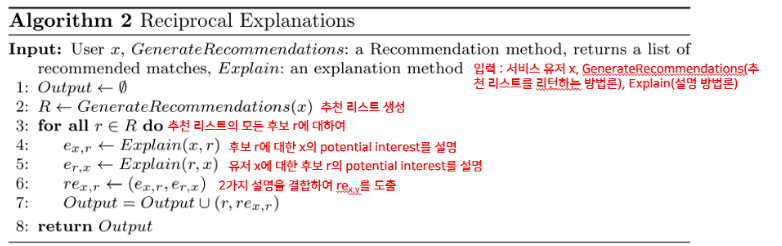

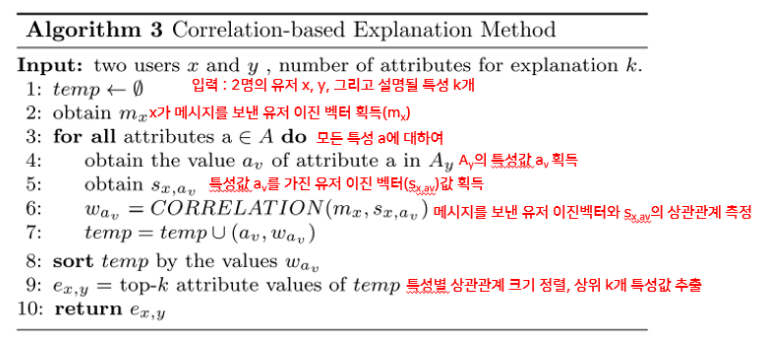

In [101]:
# # e_x,r / e_r,x
# def get_explanation(x, k=1) : # input user x
#     view_list = df[df['mem_no']==x].view_list.values[0]
#     send_list = df[df['mem_no']==x].send_list.values[0]
    
#     # m_x
#     m_x = [1 if i in send_list else 0 for i in view_list ]
#     temp = pd.DataFrame([m_x], columns =view_list, index=[x]).T
    
#     # s_x_a_v
#     # av1 : loc(same) , av2 : smoke, av3 : height, av4 : career, av5 : salary    
#     s_x_a_v_1 = [1 if property_df[property_df['mem_no']==i].mem_loc.values[0] == property_df[property_df['mem_no']==x].mem_loc.values[0] else 0 for i in temp.index]
#     s_x_a_v_2 = [property_df[property_df['mem_no']==i].smoke_slct.values[0] for i in temp.index]
#     s_x_a_v_3 = [property_df[property_df['mem_no']==i].mate_height.values[0] for i in temp.index]
#     s_x_a_v_4 = [property_df[property_df['mem_no']==i].mate_career.values[0] for i in temp.index]
#     s_x_a_v_5 = [property_df[property_df['mem_no']==i].mate_ann_salary.values[0] for i in temp.index]
    
#     temp['loc_same'] = s_x_a_v_1
#     temp['smoke_slct'] = s_x_a_v_2
#     temp['height'] = s_x_a_v_3
#     temp['career'] = s_x_a_v_4
#     temp['salary'] = s_x_a_v_5
    
#     result = temp.corr()[x].sort_values(ascending=False) # Correlation(pearson)
#     print(f'{x}와 상관관계 가장 높은 : {result.index[1]}, corr value : {result.values[1]}')
    
#     return result.index[1:k+1].tolist()

In [102]:
# get_explanation(1855569)

In [103]:
# get_explanation(1737706)

In [104]:
# def get_reciprocal_explanation(x, y, k=1) :
#     e_x_r = get_explanation(x, k=3)
#     e_y_r = get_explanation(y, k=3)
    
#     re_x_y = f'''{x}에게 {y}가 잘 어울리는 이유 : {e_x_r} //// {y}에게 {x}가 잘 어울리는 이유 : {e_y_r}'''
    
#     return re_x_y

In [105]:
# get_reciprocal_explanation(x, y)

## 4. 종합

### Reciprocal Score (CF + PR)

In [106]:
# # optimized weight α
# import time 

# def get_reciprocal_score(x, a=0.3978, k=1) :
#     reciprocal_score = []
    
#     # 1. get CF score
#     cf_time = time.time()
#     cf_score = get_top_k(x, top_k=5)
#     print(f'** CF score run time : {time.time() - cf_time:.3f}')
    
#     # 2. get PR score
#     pr_time = time.time()
#     for y, cf_score in cf_score :
#         pr_score = pred_positive_reply(x, y)[1]
#         weighted_score = (cf_score * a) + (pr_score * (1- a)) # add weight(alpha)
#         reciprocal_score.append((y, weighted_score))
#     print(f'** PR score run time : {time.time() - pr_time:.3f}')
    
#     # get Reciprocal Score
#     top_k = sorted(reciprocal_score, key=lambda x : -x[1])
#     print('candidate list :',top_k[:10])
    
#     # get reciprocal explanation for x, y(candidate)
#     explain_time = time.time()
#     explanations = []
#     for i in range(k) :
#         y = top_k[i][0]
#         explanations.append(get_reciprocal_explanation(x, y))
#     print(f'** Reciprocal Explain run time : {time.time() - explain_time:.3f}')
#     return top_k[:k], explanations

In [107]:
# x, y = 1855569, 1737706

In [108]:
# get_reciprocal_score(x, k=1)
# get_reciprocal_explanation(x, y)

In [109]:
# x = 1767059
# get_reciprocal_score(x, k=1)

In [110]:
# x = 1758150
# get_reciprocal_score(x, k=1)

## 5. 가중치 최적화

In [111]:
def find_optimal_weight(x) :
    send_list = df[df['mem_no']==x]['send_list'].values[0]
    sent_list = df[df['mem_no']==x]['sent_list'].values[0]
    
    SuccInter_x = [i for i in send_list if i in sent_list] # SuccInter_x
    V_x = send_list # V_x
    
    weights = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    results = []
    for a in weights :
        score_list = []
        for y in V_x :
            if y not in df.mem_no.values :
                continue
            reciprocal_score = (get_cf_score(x, y) * a) + (pred_positive_reply(x, y)[1] * (1 - a))
            score_list.append((y, reciprocal_score))
            
        rank = sorted(score_list, key=lambda x : -x[1])[:len(SuccInter_x)]
        rank_succ = [r[0] for r in rank if r[0] in SuccInter_x] # hit pred succ = real succ

        hit_rate = len(rank_succ) / len(SuccInter_x)
        
        if hit_rate == 1 : # return weight a with highest hit rate 
            print(f'found optimal weight : {a}')
            return a
        else :
            results.append(hit_rate)
    
    else :
        opt_index = np.argmax(results)
        print(f'found optimal weight : {weights[opt_index]}')
        return weights[opt_index]

x = 1475386    
find_optimal_weight(x)

found optimal weight : 0.3


0.3

In [112]:
# find optimized weight α for individuals
x = 1475386
send_list = df[df['mem_no']==x]['send_list'].values[0]
sent_list = df[df['mem_no']==x]['sent_list'].values[0]

In [113]:
SuccInter_x = [i for i in send_list if i in sent_list] # SuccInter_x
V_x = send_list # V_x
print(len(SuccInter_x))
print(len(V_x))

13
190


In [114]:
a = 0.4
score_list = []
for y in V_x :
    if y not in df.mem_no.values :
        continue
    reciprocal_score = (get_cf_score(x, y) * a) + (pred_positive_reply(x, y)[1] * (1 - a))
    score_list.append((y, reciprocal_score))
# score_list

In [115]:
rank = sorted(score_list, key=lambda x : -x[1])[:len(SuccInter_x)]
rank_succ = [r[0] for r in rank if r[0] in SuccInter_x]
# sorted(score_list, key=lambda x : -x[1])[:len(SuccInter_x)]
# rank
# SuccInter_x
# print(len(rank_succ) / len(SuccInter_x))

In [116]:
weights = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
results = []
for a in weights :
    score_list = []
    for y in V_x :
        if y not in df.mem_no.values :
            continue
        reciprocal_score = (get_cf_score(x, y) * a) + (pred_positive_reply(x, y)[1] * (1 - a))
        score_list.append((y, reciprocal_score))
    
    rank = sorted(score_list, key=lambda x : -x[1])[:len(SuccInter_x)]
    rank_succ = [r[0] for r in rank if r[0] in SuccInter_x]
    
    hit_rate = len(rank_succ) / len(SuccInter_x)
    if hit_rate == 1 : # hit_rate가 가장 높으면 optimal weight로 설정
        print(f'found optimal weight : {a}')
        break
    else :
        results.append(hit_rate)
else :
    opt_index = np.argmax(results)
    print(f'found optimal weight : {weights[opt_index]}')

found optimal weight : 0.3


## 6. 최종 

In [117]:
def get_cf_score(x, y) :
    sent_to_x = df[df['mem_no']==x].sent_list.values[0]    
    sent_to_y = df[df['mem_no']==y].sent_list.values[0]
    score_x_y, score_y_x = 0, 0
    for u in sent_to_y :
        try :
            u_refrom = df[df['mem_no']==u].send_list.values[0]
            x_refrom = df[df['mem_no']==x].send_list.values[0]
            intersection = list(set(u_refrom) & set(x_refrom))
            union = list(set(u_refrom) | set(x_refrom))
            if len(intersection) == 0 :
                continue
            score_x_y += len(intersection) / len(union)
        except :
            pass
        
    for v in sent_to_x :
        try :
            v_refrom = df[df['mem_no']==v].send_list.values[0]
            y_refrom = df[df['mem_no']==y].send_list.values[0]
            intersection = list(set(v_refrom) & set(y_refrom))
            union = list(set(v_refrom) | set(y_refrom))
            if len(intersection) == 0 :
                continue
            score_y_x += len(intersection) / len(union)
        except Exception as e :
            pass
#     print(score_x_y, score_y_x)
    
    if score_x_y > 0 and score_y_x > 0 :    
        harmonic_mean_score = (2 * score_x_y * score_y_x) / (score_x_y + score_y_x)
    else :
        harmonic_mean_score = 0
        
    return harmonic_mean_score
    

In [118]:
# get reciprocal_CF_Score
def get_top_k(x, top_k=1) :
    
    # 나이 제한 +- 5 이내에서만 검색
    x_age = df[df['mem_no']==x].age.values[0]
    x_gender = df[df['mem_no']==x].mem_sex.values[0]
    # recommendation candidate y range(age +- 5)
    y_range = df[(abs(x_age - df['age']) <= 5) & (df['mem_sex']!=x_gender)].mem_no.values
    
    # x에게 메시지 보낸 회원 SentTo_x
    sent_to_x = df[df['mem_no']==x].sent_list.values[0]
    # 추천 리스트[(회원번호, 점수)] 초기화
    score_list = list()
    
    print(f'my_candidate_num : {len(y_range)}') # 총 후보 수(연산 대상)
    
    for y in y_range : # 추천 후보 집단(RecommendationCandidates)의 모든 y에 대하여 반복 수행
        sent_to_y = df[df['mem_no']==y].sent_list.values[0] 
        # calculate score x_y
        score_x_y = 0 # score_x_y 초기화
        for u in sent_to_y : # y에게 메시지를 보낸 유저 집단 u에 대하여 반복 수행
            try :
                u_refrom = df[df['mem_no']==u].send_list.values[0] # u가 메시지를 보낸 유저 집합 
                x_refrom = df[df['mem_no']==x].send_list.values[0] # x가 메시지를 보낸 유저 집단
                intersection = list(set(u_refrom) & set(x_refrom)) # ReFrom_u ∩ ReFrom_x
                union = list(set(u_refrom) | set(x_refrom)) # ReFrom_u ∪ ReFrom_x
                
                if len(intersection) == 0 : # avoid zero division
                    continue
                score_x_y += len(intersection) / len(union)    # score_x_y <--- score_x_y + similarity_x_u
            except :
                pass
        score_y_x = 0 # score_y_x 초기화
        for v in sent_to_x : # x에게 메시지를 보낸 유저 집단 v에 대하여 반복 수행
            try :
                v_refrom = df[df['mem_no']==v].send_list.values[0] # v가 메시지를 보낸 유저 집합 
                y_refrom = df[df['mem_no']==y].send_list.values[0] # y가 메시지를 보낸 유저 집단
                intersection = list(set(v_refrom) & set(y_refrom)) # ReFrom_v ∩ ReFrom_y
                union = list(set(v_refrom) | set(y_refrom)) # ReFrom_v ∪ ReFrom_y
                
                if len(intersection) == 0 : # avoid zero division
                    continue
                score_y_x += len(intersection) / len(union) # score_y_x <--- score_y_x + similarity_y_v
            except :
                pass
            
        # calculate harmonic mean
        if score_x_y != 0 and score_y_x != 0 :    
            harmonic_mean_score = (2 * score_x_y * score_y_x) / (score_x_y + score_y_x)
        else :
            harmonic_mean_score = 0
        score_list.append((y, harmonic_mean_score)) # Recs <--- (y, reciprocalScore_x,y)
    
    top_k = sorted(score_list, key=lambda x : -x[1])[:top_k]
    
    return top_k # sort score and return top-k

In [119]:
def pred_positive_reply(x, y) :
    x_info = info[info['mem_no']==x]
    y_info = info[info['mem_no']==y]
    if info[info['mem_no']==x].mem_sex.values[0] == 'f' :
        x_info.columns = ['ptr_' + c for c in x_info.columns]
    else :
        y_info.columns = ['ptr_' + c for c in y_info.columns]
    x_y_info = pd.concat([y_info.reset_index(drop=True), x_info.reset_index(drop=True)],axis=1)
    x_y_info.drop(['mem_no','ptr_mem_no','mem_sex','ptr_mem_sex'], axis=1, inplace=True)
    x_y_info['age_gap'] = x_y_info['age'] - x_y_info['ptr_age']
    pred = model.predict_proba(x_y_info)[0]
    idx = np.argmax(pred)
    return idx, pred[idx]

In [120]:
# # e_x,r / e_r,x
# def get_explanation(x, k=1) : # input user x
#     view_list = df[df['mem_no']==x].view_list.values[0]
#     send_list = df[df['mem_no']==x].send_list.values[0]
    
#     # m_x
#     m_x = [1 if i in send_list else 0 for i in view_list ]
#     temp = pd.DataFrame([m_x], columns =view_list, index=[x]).T
    
#     # s_x_a_v
#     # av1 : loc(same) , av2 : smoke, av3 : height, av4 : career, av5 : salary    
#     s_x_a_v_1 = [1 if property_df[property_df['mem_no']==i].mem_loc.values[0] == property_df[property_df['mem_no']==x].mem_loc.values[0] else 0 for i in temp.index]
#     s_x_a_v_2 = [property_df[property_df['mem_no']==i].smoke_slct.values[0] for i in temp.index]
#     s_x_a_v_3 = [property_df[property_df['mem_no']==i].mate_height.values[0] for i in temp.index]
#     s_x_a_v_4 = [property_df[property_df['mem_no']==i].mate_career.values[0] for i in temp.index]
#     s_x_a_v_5 = [property_df[property_df['mem_no']==i].mate_ann_salary.values[0] for i in temp.index]
    
#     temp['loc_same'] = s_x_a_v_1
#     temp['smoke_slct'] = s_x_a_v_2
#     temp['height'] = s_x_a_v_3
#     temp['career'] = s_x_a_v_4
#     temp['salary'] = s_x_a_v_5
    
#     result = temp.corr()[x].sort_values(ascending=False) # Correlation(pearson)
#     print(result)
#     print(f'{x}와 상관관계 가장 높은 : {result.index[1]}, corr value : {result.values[1]}')
    
#     return result.index[1:k+1].tolist()

# def get_reciprocal_explanation(x, y, k=1) :
#     e_x_r = get_explanation(x, k=3)
#     e_y_r = get_explanation(y, k=3)
    
#     re_x_y = f'''{x}에게 {y}가 잘 어울리는 이유 : {e_x_r} //// {y}에게 {x}가 잘 어울리는 이유 : {e_y_r}'''
    
#     return re_x_y

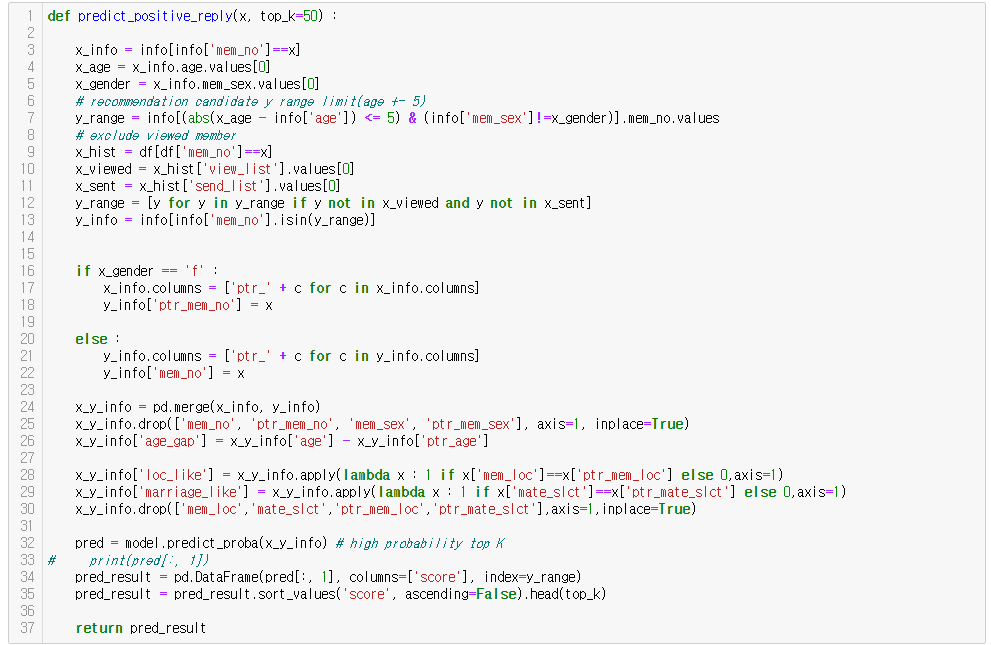

In [121]:
def get_explanation(x, y, k=3) :
    view_list = df[df['mem_no']==x].view_list.values[0]
    send_list = df[df['mem_no']==x].send_list.values[0]
    
    # m_x
    m_x = [1 if i in send_list else 0 for i in view_list]
    a_v_df = pd.DataFrame([m_x], columns=view_list, index=[x]).T

    # S_x_a_v
    for col in property_df.columns[1:] :
        s_x_a_v = [property_df[property_df['mem_no']==y][col].values[0] for y in a_v_df.index]
        a_v_df[col] = s_x_a_v
        
    a_v_df = pd.get_dummies(a_v_df)

    y_a_v = pd.get_dummies(property_df[property_df['mem_no']==y])
    
    for y_col in y_a_v.columns :
#         print(y_col)
        if y_col in a_v_df.columns and y_a_v[y_col].values[0] != 1 :
            a_v_df.drop(y_col, inplace=True, axis=1)
#             print(f'{y_col} removed')
    a_v_df.drop([c for c in a_v_df.columns if c not in y_a_v.columns and c != x], axis=1, inplace=True)

    
    result = a_v_df.corr()[x].sort_values(ascending=False)
    print(f'Highest correlation features for {x} : {[result.index[1]]}, correlation value : {result.values[1]}')
    return result.index[1:k+1].tolist()

In [122]:
def get_reciprocal_explanation(x, y, k=1) :
    e_x_r = get_explanation(x, y, k=3)
    e_y_r = get_explanation(y, x, k=3)
    
    re_x_y = f'''{x}에게 {y}가 잘 어울리는 이유 : {e_x_r} //// {y}에게 {x}가 잘 어울리는 이유 : {e_y_r}'''
    
    return re_x_y

In [123]:
def get_reciprocal_score(x, a=0.3978, k=1) :
    reciprocal_score = []
    
    # 1. get CF score
    cf_time = time.time()
    cf_score = get_top_k(x, top_k=5)
    print(f'** CF score run time : {time.time() - cf_time:.3f}')
    
    # 2. get PR score
    pr_time = time.time()
    for y, cf_score in cf_score :
        pr_score = pred_positive_reply(x, y)[1]
        weighted_score = (cf_score * a) + (pr_score * (1- a)) # add weight(alpha)
        reciprocal_score.append((y, weighted_score))
    print(f'** PR score run time : {time.time() - pr_time:.3f}')
    
    # get Reciprocal Score
    top_k = sorted(reciprocal_score, key=lambda x : -x[1])
    print('candidate list :',top_k[:10])
    
    # get reciprocal explanation for x, y(candidate)
    explain_time = time.time()
    explanations = []
    for i in range(k) :
        y = top_k[i][0]
        explanations.append(get_reciprocal_explanation(x, y, k=3))
    print(f'** Reciprocal Explain run time : {time.time() - explain_time:.3f}')
    return top_k[:k], explanations

def get_reciprocal_recommendation(x) :
    a = find_optimal_weight(x)
    rec, explanation = get_reciprocal_score(x, a)
    return rec, explanation

In [126]:
get_reciprocal_recommendation(x)

found optimal weight : 0.3
my_candidate_num : 478
** CF score run time : 7.160
** PR score run time : 0.025
candidate list : [(1855936, 1.0739514531789973), (1851318, 1.024393849247136), (1826258, 1.0235633659851036), (1547500, 1.0229915852764573), (1839870, 0.9957784030594915)]
Highest correlation features for 1475386 : ['mate_height_160'], correlation value : 0.08430597317794712
Highest correlation features for 1855936 : ['mate_height_170'], correlation value : 0.35355339059327373
** Reciprocal Explain run time : 3.282


([(1855936, 1.0739514531789973)],
 ["1475386에게 1855936가 잘 어울리는 이유 : ['mate_height_160', 'mate_job_n', 'food_type_5'] //// 1855936에게 1475386가 잘 어울리는 이유 : ['mate_height_170', 'drink_slct', 'mem_loc_k']"])